In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anto\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anto\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anto\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [3]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anto\AppData\Roaming\nltk_data...


True

In [6]:
df = pd.read_csv(r'D:\python\projects\fake reviews dataset\fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [7]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [9]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
df['rating'].value_counts()

5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: rating, dtype: int64

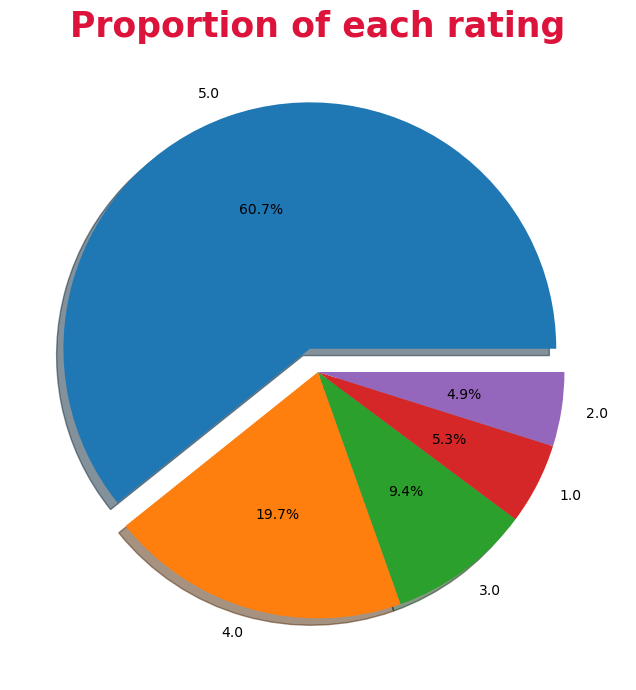

In [11]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [12]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [13]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [14]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [15]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [16]:
df.shape

(40432, 4)

In [17]:
df['text_'] = df['text_'].astype(str)

In [18]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [19]:
preprocess(df['text_'][4])

'Very nice set Good quality We set two months'

In [20]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)

In [21]:
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

In [22]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

In [23]:
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)

In [24]:
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)

In [25]:
df['text_'] = df['text_'].str.lower()

In [26]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [27]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [28]:
df['text_'].head()


0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text_, dtype: object

In [29]:
df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

In [30]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [32]:
print(df.columns)

Index(['category', 'rating', 'label', 'text_'], dtype='object')


In [35]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [36]:
df.dropna(inplace=True)

In [37]:
df['length'] = df['text_'].apply(len)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
 4   length    40432 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


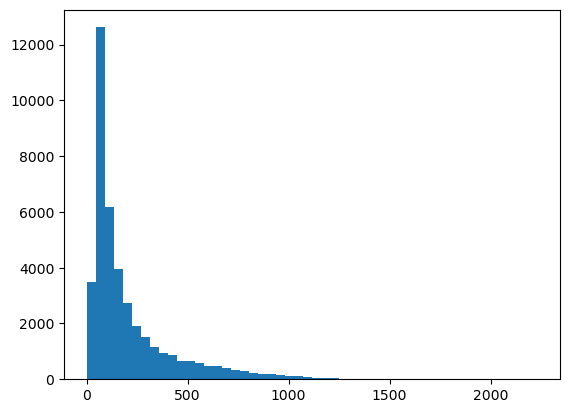

In [39]:
plt.hist(df['length'],bins=50)
plt.show()

In [40]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20216.0  4.259893  1.141065  1.0  4.0  5.0  5.0  5.0  20216.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                
             mean         std  min   25%    50%    75%     max  
label                                                           
CG     173.630441  173.955236  0.0  57.0   99.0  217.0  1300.0  
OR     237.892758  252.920635  8.0  74.0  134.0  296.0  2232.0

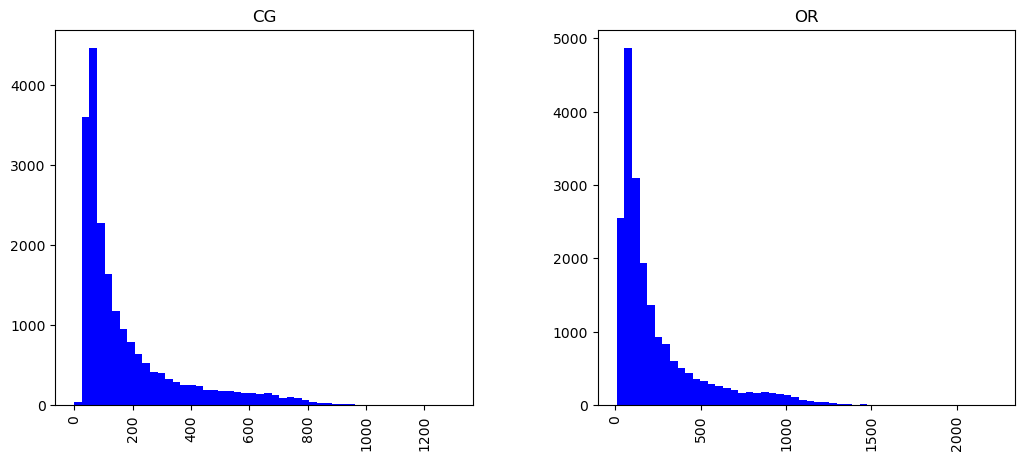

In [41]:
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

In [42]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"weak on current scienc after see twice i agre much posit five star review out respect read review i 'll repeat everyth i like present i found goofi over ear hairdo facial hair arrang daniel vitali describ `` wild food expert '' distract ugh ditto david wolf extrem goofi wild hairdo on hand jon gabriel describ `` author weight loss expert '' nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america 's cutest doctor a realli nice look woman present dr. mercola jason vale kri carr alejandro junger fine it disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor t. colin campbel milk bodi bad it good see present take stand sugar they agre evil sugar refin carbohydr with respect dr. northrup `` it 's fat make fat 's sugar '' statement pas muster commun expert recogn evil sugar not mutual exclus recogn proven danger fat particularl

In [43]:
df.length.describe()

count    40432.000000
mean       205.761600
std        219.421757
min          0.000000
25%         64.000000
50%        116.000000
75%        253.000000
max       2232.000000
Name: length, dtype: float64

In [44]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [45]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x0000017B3364E5C0>)

In [46]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34450


In [47]:
review4 = df['text_'][3]
review4

'miss inform use great product price i'

In [48]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 13598)	1
  (0, 15840)	1
  (0, 19848)	1
  (0, 23847)	1
  (0, 23977)	1
  (0, 32182)	1
(1, 34450)


In [49]:
print(bow_transformer.get_feature_names()[15841])
print(bow_transformer.get_feature_names()[23848])

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [50]:
bow_reviews = bow_transformer.transform(df['text_'])

In [51]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40432, 34450)
Amount of non zero values in the bag of words model: 1013898


In [52]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [53]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 13598)	1
  (0, 15840)	1
  (0, 19848)	1
  (0, 23847)	1
  (0, 23977)	1
  (0, 32182)	1


In [54]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.914254381647021
2.821709117755722


In [55]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40432, 34450)
No. of Dimensions: 2


In [71]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.20)

In [72]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [73]:
#Training and testing Multinomial Naive Bayes Algorithm on the preprocessed data

In [74]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000017B3364E5C0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [75]:
predictions = pipeline.predict(review_test)
predictions

array(['OR', 'OR', 'OR', ..., 'CG', 'OR', 'CG'], dtype='<U2')

In [88]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [76]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.83      0.89      0.86      4049
          OR       0.88      0.82      0.85      4038

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087

Confusion Matrix: [[3589  460]
 [ 733 3305]]
Accuracy Score: 0.8524792877457648


In [77]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 85.25%


In [78]:

print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)))

Multinomial Naive Bayes Prediction Accuracy: 85.25


In [91]:
import h5py
import pickle
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Example: Create and train a pipeline model (if not already trained)
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),
#     ('svc', SVC())
# ])
# pipeline.fit(review_train, label_train)

# Save the trained pipeline model
model_str = pickle.dumps(pipeline)
model_arr = np.frombuffer(model_str, dtype=np.uint8)
with h5py.File('fake_review.h5', 'w') as h5f:
    h5f.create_dataset('model', data=model_arr)

print("fake review model saved to fake_review.h5")


fake review model saved to fake_review.h5


In [93]:
# Load the pipeline model
with h5py.File('fake_review.h5', 'r') as h5f:
    model_arr = h5f['model'][:]
model_str = model_arr.tobytes()
loaded_pipeline = pickle.loads(model_str)

print("fake review model loaded to fake_review.h5")

# Make predictions on the test data
predictions = loaded_pipeline.predict(review_test)
print(predictions)

# Printing classification report, confusion matrix, and accuracy
print('Classification Report:', classification_report(label_test, predictions))
print('Confusion Matrix:', confusion_matrix(label_test, predictions))
print('Accuracy Score:', accuracy_score(label_test, predictions))
print('Model Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions) * 100, 2)) + '%')

fake review model loaded to fake_review.h5
['OR' 'CG' 'OR' ... 'CG' 'CG' 'CG']
Classification Report:               precision    recall  f1-score   support

          CG       0.90      0.87      0.88      4049
          OR       0.87      0.90      0.89      4038

    accuracy                           0.89      8087
   macro avg       0.89      0.89      0.89      8087
weighted avg       0.89      0.89      0.89      8087

Confusion Matrix: [[3524  525]
 [ 396 3642]]
Accuracy Score: 0.8861135155187337
Model Prediction Accuracy: 88.61%


In [79]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])


In [80]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000017B3364E5C0>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [81]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['OR', 'CG', 'OR', ..., 'CG', 'CG', 'CG'], dtype=object)

In [82]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.90      0.87      0.88      4049
          OR       0.87      0.90      0.89      4038

    accuracy                           0.89      8087
   macro avg       0.89      0.89      0.89      8087
weighted avg       0.89      0.89      0.89      8087

Confusion Matrix: [[3524  525]
 [ 396 3642]]
Accuracy Score: 0.8861135155187337
Model Prediction Accuracy: 88.61%


In [83]:
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Support Vector Machines Prediction Accuracy: 88.61%


In [101]:
import tkinter as tk
from tkinter import messagebox
import h5py
import pickle
import numpy as np
import os

def find_model_path(filename):
    cwd = os.getcwd()
    for root, dirs, files in os.walk(cwd):
        if filename in files:
            return os.path.join(root, filename)
    return None

def load_model(file_path):
    with h5py.File(file_path, 'r') as h5f:
        model_arr = h5f['model'][:]
    model_str = model_arr.tobytes()
    model = pickle.loads(model_str)
    return model

def check_review():
    review = review_entry.get("1.0", tk.END).strip()
    if not review:
        messagebox.showwarning("Input Error", "Please enter a review.")
        return
    prediction = loaded_pipeline.predict([review])[0]
    if prediction == 1:
        result = "The review is likely fake."
    else:
        result = "The review is likely genuine."
    result_label.config(text=result)

# Find the path of the saved model
model_path = find_model_path('fake_review.h5')
if model_path:
    loaded_pipeline = load_model(model_path)
else:
    raise FileNotFoundError("Model 'fake_review.h5' not found.")

# Create the main window
root = tk.Tk()
root.title("Fake Review Checker")

# Create and place the widgets
review_label = tk.Label(root, text="Enter a Review:")
review_label.pack(pady=10)

review_entry = tk.Text(root, height=10, width=50)
review_entry.pack(pady=10)

check_button = tk.Button(root, text="Check Review", command=check_review)
check_button.pack(pady=10)

result_label = tk.Label(root, text="")
result_label.pack(pady=10)

# Start the Tkinter main loop
root.mainloop()
